In [31]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys



sys.path.append(os.path.abspath("../../../src"))   
import soporte_regresion as f


pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

In [32]:
df_encoded=pd.read_csv("..\..\..\datos\datos1\datos_clusterizados1_encoded_sinout.csv", index_col=0)

In [33]:
df_encoded.head()

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
0,307.95,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.33,1.67,-0.00,1.20
1,497.45,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-1.26,1.67,0.54,2.45
2,554.52,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.03,1.67,0.54,1.75
3,419.99,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.04,1.67,6.36,1.90
4,464.86,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.72,0.71,1.05,2.37


In [34]:
x= df_encoded.drop(columns="Sales_unitario")
y= df_encoded[["Sales_unitario"]]

In [35]:
x_train,x_test,y_train,y_test= train_test_split(x, y, train_size=0.7, random_state=42, shuffle=True)  

Voy a meter los parametros de mi mejor modelo (modelo 3)

    'max_depth': [4,5,6],
    'min_samples_split': [8,9,10],
    'min_samples_leaf': [10,20,30,100],
    'max_leaf_nodes': [10,70,180,190,200,250]

In [36]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [48,50,52],    #número de árboles que queremos que haga
    'max_features': [34,35,36],
    'max_depth': [3,4,5],
    'min_samples_split': [5,6,7],
    'min_samples_leaf': [7,8,9], 
    'max_leaf_nodes': [10,20,25,30,50]
}

modelo_rf1= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf1= GridSearchCV(modelo_rf1,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf1.fit(x_train,y_train["Sales_unitario"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf1= grid_search_rf1.best_estimator_
modelo_final_rf1

RandomForestRegressor(max_depth=5, max_features=35, max_leaf_nodes=30,
                      min_samples_leaf=7, min_samples_split=5, n_estimators=50,
                      random_state=42)

In [37]:
y_pred_test_rf1=modelo_final_rf1.predict(x_test)
y_pred_train_rf1=modelo_final_rf1.predict(x_train)

In [38]:
df_metricas_rf1= f.metricas(y_train,y_pred_train_rf1, y_test , y_pred_test_rf1)
df_metricas_rf1.T

,r2_score,MAE,MSE,RMSE
train,0.59,32.43,"2,961.01",54.42
test,0.58,33.49,"3,361.41",57.98


PRUEBA de modelo con otros parametros



In [39]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [35,45,50,60],    #número de árboles que queremos que haga
    'max_features': [30,35,40],
    'max_depth': [3,4,5],
    'min_samples_split': [7,8,9,10],
    'min_samples_leaf': [9,10,15], 
    'max_leaf_nodes': [8,30,70,100,130]
}

modelo_rf= RandomForestRegressor(random_state=42, bootstrap=True)    #bootstrap es para que haga un muestreo con remplazo (hace que dentro de distintos árboles te pueda coger el mismo dato)
grid_search_rf= GridSearchCV(modelo_rf,
                             params_rf,
                             cv=3,
                             scoring= "neg_mean_squared_error",
                             n_jobs=-1)

grid_search_rf.fit(x_train,y_train["Sales_unitario"].values)   #esta puesto así porque se necesita un array de una dimension
modelo_final_rf= grid_search_rf.best_estimator_
modelo_final_rf

RandomForestRegressor(max_depth=4, max_features=35, max_leaf_nodes=30,
                      min_samples_leaf=9, min_samples_split=7, n_estimators=50,
                      random_state=42)

In [40]:
y_pred_test_rf=modelo_final_rf.predict(x_test)
y_pred_train_rf=modelo_final_rf.predict(x_train)

In [41]:
df_metricas_rf= f.metricas(y_train,y_pred_train_rf, y_test , y_pred_test_rf)
df_metricas_rf.T

,r2_score,MAE,MSE,RMSE
train,0.57,33.29,"3,127.72",55.93
test,0.57,34.01,"3,457.93",58.80


### De estos 2 modelos de Random Forest me quedo con el modelo 1 porque aunque cuenta con un poco más de over fitting (nada exagerado), creo que merece la pena por las mejoras tanto en mayor r cuadrado como en menores errores (Lo he probado con 0,7 y con 0,8 y me da el mejor resultado el 0,7)

In [44]:
df_importancia=pd.DataFrame(modelo_final_rf1.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by= "Importancia", ascending=False)
df_importancia.head()

,Importancia
Sub-Category_standard,0.59
Discount_standard,0.24
City_standard,0.13
Category_standard,0.01
month_November,0.00


<Axes: xlabel='Importancia', ylabel='None'>

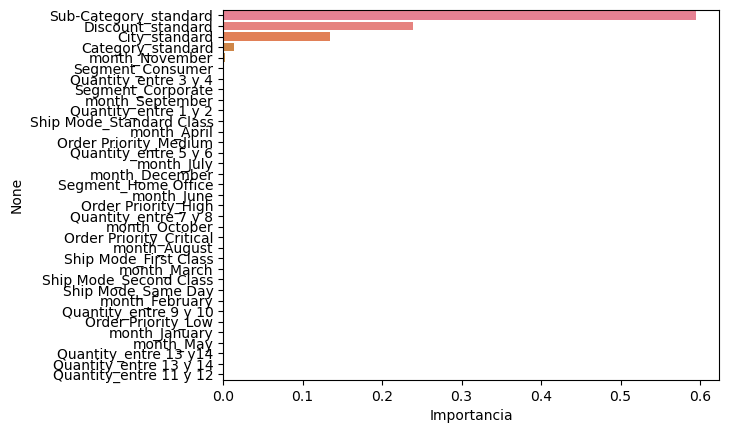

In [43]:
sns.barplot(x="Importancia", y= df_importancia.index, hue=df_importancia.index, data= df_importancia)

No dropeo esas columnas porque me genera mucho Over fitting hacerlo  
## Conclusión:  
- Para la predicción de los ingresos unitarios usando los datos de clientes 1, las variables más determinantes son las Sub-categorías, los descuentos, la ciudad y las categorías del producto.